In [1]:
from utils import get_all_data, read_dataset, mean_square_error,generateSinData
from gp import GaussianProcess, SparseGaussianProcess
from kernels import ARDKernel
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
X,Y = generateSinData(500)
gpp = GaussianProcess(X,Y)

In [2]:
trainX, trainY, testX, testY = get_all_data("kin40k")
points = 300
gpp = GaussianProcess(np.array(trainX[0:points,:],dtype=np.float64), np.array(trainY[0:points,:],dtype=np.float64))

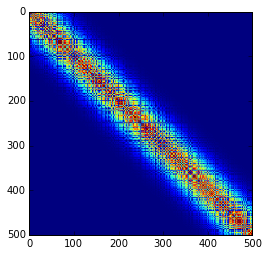

In [14]:
plt.imshow(gpp.eval_kernel())

In [ ]:
#res = gpp.plain_gradient_descent(maxiters=2000,step=0.01)
#res = gpp.RMSprop(maxiters=300)
#plt.plot(res)
#gpp.train_numpy_cost_grads(method=None)
cost = []
rms = gpp.RMSprop()
for i in range(1000):
    cost.append(rms(gpp.xtrain,gpp.xtrain))
plt.plot(cost)

In [ ]:
plt.imshow(gpp.eval_kernel())

In [ ]:
mu,cov = gpp.getPosteriorPredictive(pred_x=X)
print mean_square_error(mu,Y)
plt.plot(mu.T[0])

In [7]:
mu,cov = gpp.getPosteriorPredictive(pred_x=testX[:1000])
print mean_square_error(mu,testY[:1000])

0.283050121875
